In [2]:
import numpy as np
import IPython.display as ip
import matplotlib.pyplot as plt
import scipy.io.wavfile as rd
from scipy.fftpack import fft,ifft,fftshift, fftfreq, rfft, irfft
from scipy.signal import spectrogram
from scipy import signal
import pywt

## Ej. 1

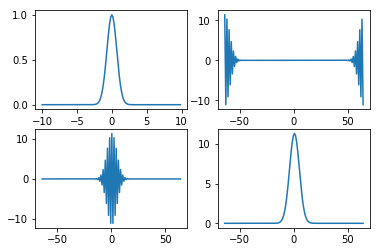

In [2]:
L = 20
n = 128
x2 = np.linspace(-L/2 , L/2, n+1)
x = x2[0:n]
frmodes = np.linspace(-n/2 , n/2, n)
u = np.exp(-x*x)
ut =fft(u)
utshift = fftshift(ut)


plt.subplot(221)
plt.plot(x,u)
plt.subplot(222)
plt.plot(frmodes,np.real(ut))
plt.subplot(223)
plt.plot(frmodes,np.real(utshift))
plt.subplot(224)
plt.plot(frmodes,abs(utshift))


plt.show()

## Ej. 2

<class 'numpy.ndarray'>


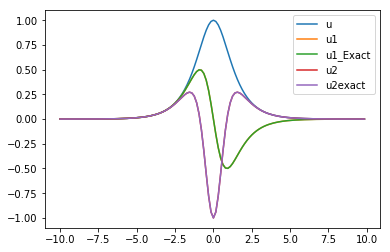

In [9]:
L = 20
n = 128
x2 = np.linspace(-L/2 , L/2, n+1)
x = x2[0:n]
dx = x[1] - x[0]
u = 1/np.cosh(x)
ut = fft(u)
k = np.append((2*np.pi/L)*np.arange(0,(n/2)),(2*np.pi/L)*np.arange((-n/2),0))
ut1 = 1j*k*ut
ut2 = -k*k*ut
u1 = np.real(ifft(ut1))
u2 = np.real(ifft(ut2))
u1exact = -1/np.cosh(x) * np.tanh(x)
u2exact = 1/np.cosh(x) -2*(1/np.cosh(x))**3

ux=[]
ux2=[]

print(type(u))

ux.append((-3*u[0]+4*u[1]-u[2])/(2*dx))
for a in range(1,n-1):
    ux.append((u[a+1]-u[a-1])/(2*dx))

ux.append((3*u[n-1]-4*u[n-2]+u[n-3])/(2*dx))


ux2.append((-3*u[0]+4*u[1]-u[2])/(2*dx))
ux2.append((-3*u[1]+4*u[2]-u[3])/(2*dx))
for b in range(2,n-2):
    ux2.append((-u[b+2]+8*u[b+1]-8*u[b-1]+u[b-2])/(12*dx))

ux2.append((3*u[n-2]-4*u[n-3]+u[n-4])/(2*dx))
ux2.append((3*u[n-1]-4*u[n-2]+u[n-3])/(2*dx))


plt.plot(x,u,x,u1,x,u1exact,x,u2,x,u2exact)
plt.legend(["u","u1","u1_Exact","u2","u2exact"])

plt.show()

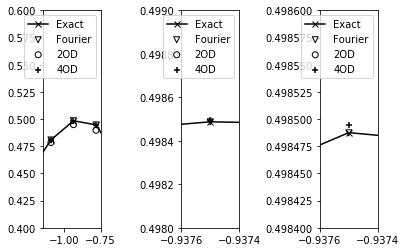

In [17]:
plt.subplot(1,5,1)
plt.plot(x,u1exact,"kx-")
plt.scatter(x,u1,marker="v",facecolors='none', edgecolors='k')
plt.scatter(x,ux,marker="o",facecolors='none', edgecolors='k')
plt.scatter(x,ux2,marker="+",facecolors='k', edgecolors='k')
plt.axis([-1.15,-0.75,0.4,0.6])
plt.legend(["Exact","Fourier","2OD","4OD",])

plt.subplot(1,5,3)
plt.plot(x,u1exact,"kx-")
plt.scatter(x,u1,marker="v",facecolors='none', edgecolors='k')
plt.scatter(x,ux,marker="o",facecolors='none', edgecolors='k')
plt.scatter(x,ux2,marker="+",facecolors='k', edgecolors='k')
plt.axis([-0.9376,-0.9374,0.498,0.499])
plt.legend(["Exact","Fourier","2OD","4OD",])


plt.subplot(1,5,5)
plt.plot(x,u1exact,"kx-")
plt.scatter(x,u1,marker="v",facecolors='none', edgecolors='k')
plt.scatter(x,ux,marker="o",facecolors='none', edgecolors='k')
plt.scatter(x,ux2,marker="+",facecolors='k', edgecolors='k')
plt.axis([-0.9376,-0.9374,0.4984,0.4986])
plt.legend(["Exact","Fourier","2OD","4OD",])

plt.show()

## Ej. 4

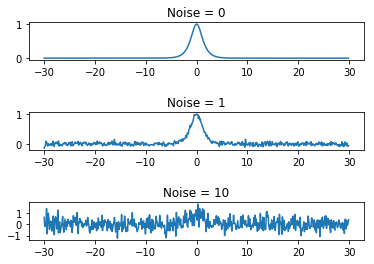

In [69]:
L = 30
n = 512
t2 = np.linspace(-L,L,n+1)
t = t2[0:n]
k = np.append((np.pi/L)*np.arange(0,(n/2)),(np.pi/L)*np.arange((-n/2),0))
u = 1/np.cosh(t)

noise = 1
ut = fft(u)
utn = ut +noise*(np.random.randn(n) + 1j*np.random.randn(n))
un = np.real(ifft(utn))

plt.subplot(5,1,1)
plt.plot(t,u)
plt.title("Noise = 0")

plt.subplot(5,1,3)
plt.plot(t,un)
plt.title("Noise = 1")


noise = 10
utn = ut +noise*(np.random.randn(n) + 1j*np.random.randn(n))
un = np.real(ifft(utn))


plt.subplot(5,1,5)
plt.plot(t,un)
plt.title("Noise = 10")

plt.show()


/home/jcsolarte10/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


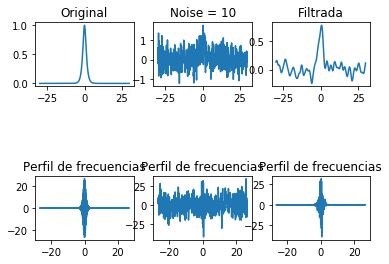

In [87]:
filtro = np.exp(-0.2*k**2)
unft= filtro * utn
unf = np.real(ifft(unft))


plt.subplot(3,3,1)
plt.plot(t,u)
plt.title("Original")

plt.subplot(3,3,2)
plt.plot(t,un)
plt.title("Noise = 10")

plt.subplot(3,3,3)
plt.plot(t,unf)
plt.title("Filtrada")

plt.subplot(3,3,7)
plt.plot(k,ut)
plt.title("Perfil de frecuencias")

plt.subplot(3,3,8)
plt.plot(k,utn)
plt.title("Perfil de frecuencias")

plt.subplot(3,3,9)
plt.plot(k,unft)
plt.title("Perfil de frecuencias")

plt.show()

## Ej. 5

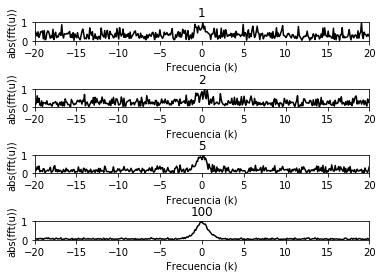

In [97]:
L = 30
n = 512
t2 = np.linspace(-L,L,n+1)
t = t2[0:n]
k = np.append((np.pi/L)*np.arange(0,(n/2)),(np.pi/L)*np.arange((-n/2),0))
ks = fftshift(k)
noise = 10

rep = [1,2,5,100]

for s in range(len(rep)):
    
    r = rep[s]
    u = 1/ np.cosh(t)
    ave = np.zeros(n)
    ut = fft(u)
    
    for l in range(r):
        utn = ut + noise*(np.random.randn(n) + 1j*np.random.randn(n))
        ave = ave + utn
    
    ave = abs(fftshift(ave))/r
    
    plt.subplot(10,1,3*s+1)
    plt.plot(ks,ave/max(ave),"k-")
    plt.axis([-20,20,0,1])
    plt.xlabel("Frecuencia (k)")
    plt.ylabel("abs(fft(u))")
    plt.title(str(r))
    
    
plt.show()

/home/jcsolarte10/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


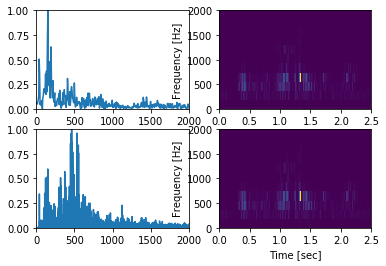

In [136]:
(a,b)=rd.read("./New.wav")
b = np.array(b)
v = []
for i in range(len(b)):
    v.append(b[i][1])


v = np.array(v)
v.reshape(1,len(v))

t = np.arange(0,len(v)/a,1/a)

t=t[80000:400000]-t[80000]
v=v[80000:400000]

n=2**17
t=t[:n]
v=v[:n]



plt.subplot(2,2,1)
tv = abs(fftshift(fft(v[:8000])))
freq = fftshift(fftfreq(8000,1/a))
plt.plot(freq,tv/max(tv))
plt.axis([0,2000,0,1])

plt.subplot(2,2,3)
d,c = signal.butter(2,(5000)/(a/2),btype='low', analog=False)
vf = signal.lfilter(d,c,v)

tvf = fft(vf)
freq = (fftfreq(n,1/a))
plt.plot(freq,tvf/max(tvf))
plt.axis([0,2000,0,1])
vf=np.real(ifft(tvf))

plt.subplot(2,2,2)
f,t2,Sxx = spectrogram(v,a)
plt.pcolormesh(t2, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.axis([0,2.5,0,2000])


plt.subplot(2,2,4)
f,t2,Sxx = spectrogram(vf,a)
plt.pcolormesh(t2, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.axis([0,2.5,0,2000])


plt.show()


ip.Audio(v,rate=a)

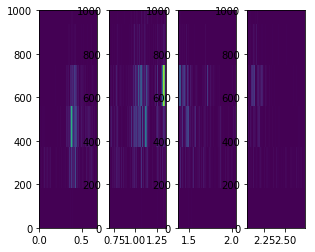

In [137]:
ts = np.linspace(0,t[-1],5)
vnw = np.array([0])
for m in range(len(ts)-1):
    ti = ts[m]
    tf = ts[m+1]
    
    plt.subplot(1,len(ts),m+1)
    plt.pcolormesh(t2, f, Sxx)
    plt.axis([ti,tf,0,1000])
    
plt.show()

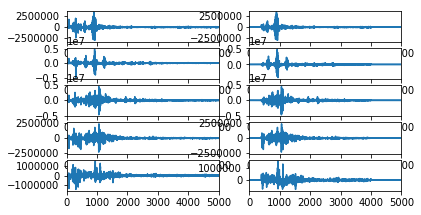

In [139]:
ts = np.linspace(0,t[-1],6)
vnw = np.array([0])
for m in range(len(ts)-1):
    ti = ts[m]
    tf = ts[m+1]
    t1 = t[int(ti*a):int(tf*a)]
    v1 = v[int(ti*a):int(tf*a)]
    tv = rfft(v1)
    tv = tv
    freq = fftfreq(len(t1),d= 1/a)
    
    plt.subplot(len(ts),2,m*2+1)
    plt.plot(freq,tv)
    plt.xlim(0,5000)
    
    
    flt1 = freq<4000
    flt2 = freq>400
    tvf = tv*flt1*(freq>400)
        
    
    plt.subplot(len(ts),2,m*2+2)
    plt.plot(freq,tvf)
    plt.xlim(0,5000)
    
    vnw=np.append(vnw,np.real(irfft(tvf)))

plt.show()
ip.Audio(vnw,rate=a)

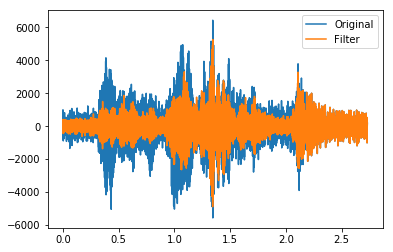

In [104]:
plt.plot(t,v,t,vnw)
plt.legend(["Original","Filter"])
plt.show()

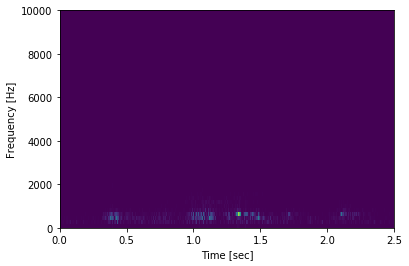

In [107]:
f,t2,Sxx = spectrogram(vnw,a)
plt.pcolormesh(t2, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.axis([0,2.5,0,10000])


plt.show()

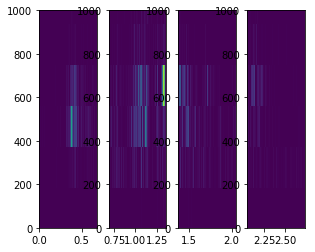

In [64]:
f,t2,Sxx = spectrogram(vnw,a)
ts = np.linspace(0,t[-1],5)
vnw = np.array([0])
for m in range(len(ts)-1):
    ti = ts[m]
    tf = ts[m+1]
    
    plt.subplot(1,len(ts),m+1)
    plt.pcolormesh(t2, f, Sxx)
    plt.axis([ti,tf,0,1000])
    
plt.show()

In [247]:
vf == vnw[1:]

array([False, False, False, ..., False, False, False], dtype=bool)

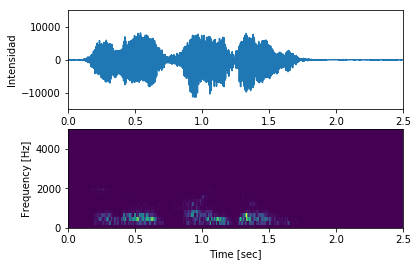

In [140]:
(a,b)=rd.read("./Recording.wav")
b = np.array(b)
v = []
for i in range(len(b)):
    v.append(b[i][1])


v = np.array(v)
v.reshape(1,len(v))

t = np.arange(0,len(v)/a,1/a)
n = 2**17
t=t[:n]
v=v[:n]
ip.Audio(v,rate=a)

plt.subplot(2,1,1)
plt.plot(t,v)
plt.ylabel('Intensidad')
plt.xlabel('Time [sec]')
plt.axis([0,2.5,-15000,15000])


plt.subplot(2,1,2)
f,t2,Sxx = spectrogram(v,a)
plt.pcolormesh(t2, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.axis([0,2.5,0,5000])


plt.show()

ip.Audio(v,rate=a)

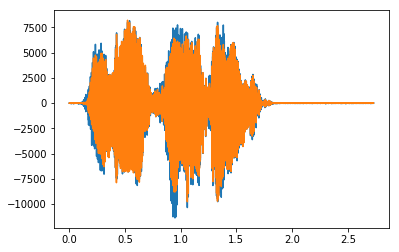

In [148]:
tv = rfft(v)
freq = fftfreq(len(tv),d= 1/a)
tvf = tv * (freq<2000)
vf=np.real(irfft(tvf))
plt.plot(t,v,t,vf)
plt.show()
ip.Audio(vf,rate=a)

In [128]:
plt.subplot(1,3,1)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.axis([0,0.25,0,1000])

plt.subplot(1,3,2)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.axis([0.75,1.25,0,2000])

plt.subplot(1,3,3)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.axis([1.5,1.25,0,5000])

plt.show()

TypeError: Dimensions of C (129, 585) are incompatible with X (131072) and/or Y (129); see help(pcolormesh)

In [18]:
v = v*np.random.randn(len(v))
c,a = signal.butter(5,(3800)/(8000/2),btype='low', analog=False)
v = signal.lfilter(c,a,v)
plt.plot(t,v)

ip.Audio(v,rate=a)
f,t,Sxx = spectrogram(v,a)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.axis([0,2.5,0,5000])


plt.show()

ValueError: x and y must have same first dimension, but have shapes (585,) and (131072,)

In [70]:
t[-1]

2.7280000000000002

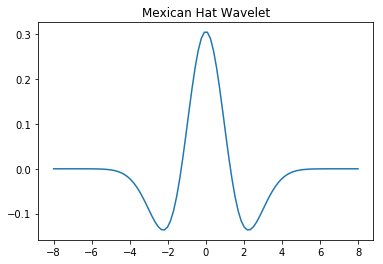

In [109]:
a=8
p=100
vec = signal.ricker(p,a)
t = np.linspace(-a,a,p)
plt.plot(t,vec)
plt.title("Mexican Hat Wavelet")
plt.show()

In [65]:
a = np.array([1,2,3])
b = np.array([14,15,8])
a+b

array([15, 17, 11])